In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats.mstats import trimmed_var
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA




import warnings


warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)


In [107]:
#load data
df=pd.read_csv("country-data.csv")
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [108]:
df.info()
print("df shape", df.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB
df shape (167, 10)


In [109]:
#check for missing values
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [110]:
print(df.describe())

       child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000

In [111]:
#check for duplicates
print("Number of duplicate rows:", df.duplicated().sum())


Number of duplicate rows: 0


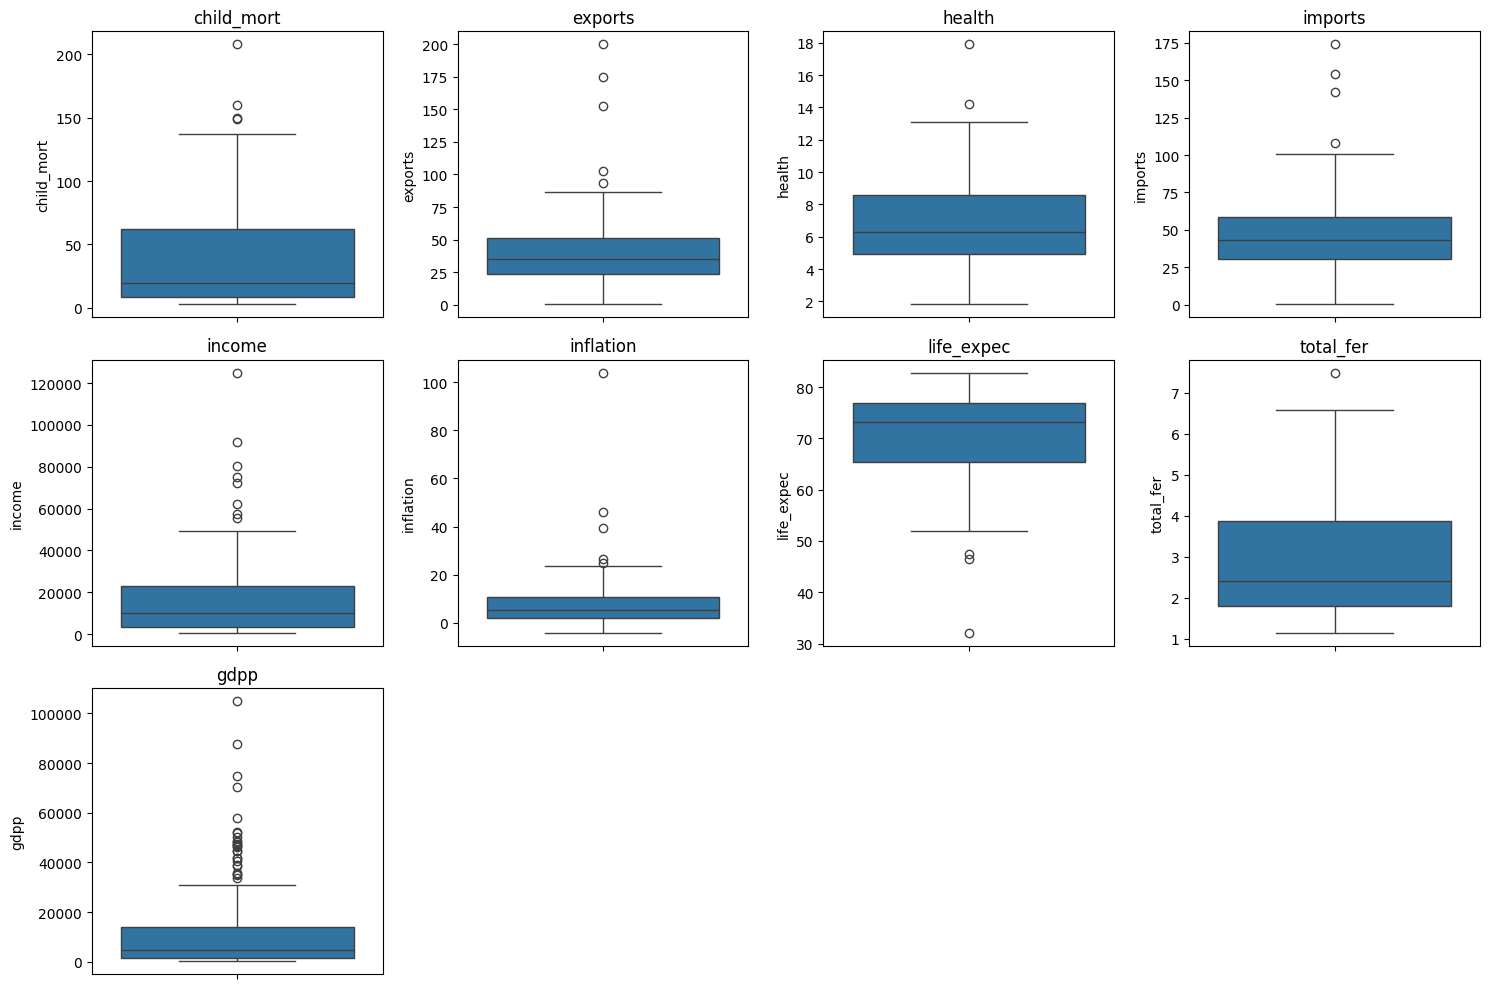

In [112]:
#inspect outliers
num_cols = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(15,10))
for i, col in enumerate(num_cols):
    plt.subplot(3, 4, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


Columns like child_mort, income, exports, imports, inflation have extreme outliers

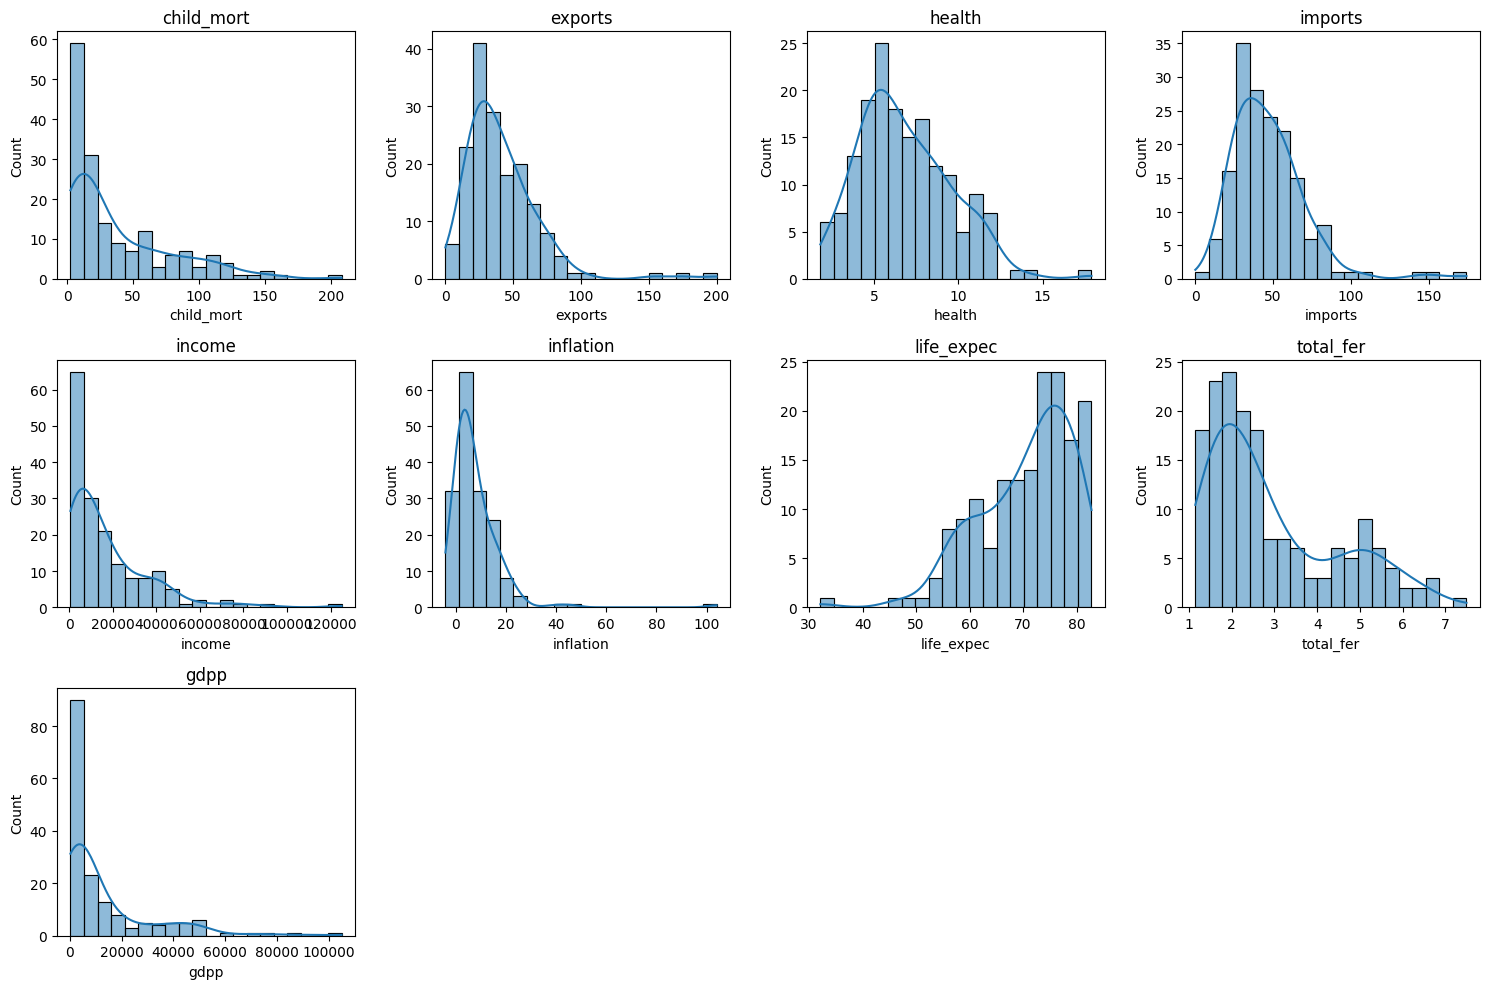

In [113]:
#visuaize distributions
plt.figure(figsize=(15,10))
for i, col in enumerate(num_cols):
    plt.subplot(3, 4, i+1)
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()


Right-skewed: child_mort, income, exports, imports

Left-skewed: life_expec

In [114]:

#features with largest variance
#drop non numeric column
df1=df.drop(columns=["country"])
top_var=(df1.var().sort_values(ascending=False).head(10))/1e6
top_var_names=top_var.index.to_list()
top_var_names


['income',
 'gdpp',
 'child_mort',
 'exports',
 'imports',
 'inflation',
 'life_expec',
 'health',
 'total_fer']

Build model

In [115]:
#split/feature matrix X
X=df[top_var_names]


first k-means model will have n_clusters(2, 11) . Each time it is trained , inertia and silhouette score  is calculated and added to  lists

In [116]:
#first model, for loop
n_clusters= range(2,11)
inertia_errors=[]
silhouette_scores=[]

#train model and calculate inertia and silhoutte scores
for k in n_clusters:
    #build model
    model=make_pipeline(StandardScaler(),KMeans(n_clusters=k, random_state=42))

    #train model
    model.fit(X)

    inertia_errors.append(model.named_steps["kmeans"].inertia_)
    
    X_scaled=model.named_steps["standardscaler"].transform(X)
    silhouette_scores.append(silhouette_score(X_scaled,model.named_steps["kmeans"].labels_))
    print("inertia_errors:", inertia_errors)
    print("silhouette_scores:", silhouette_scores)

inertia_errors: [1063.4825600467796]
silhouette_scores: [0.2662961111870726]
inertia_errors: [1063.4825600467796, 831.5351582151586]
silhouette_scores: [0.2662961111870726, 0.285600988953231]
inertia_errors: [1063.4825600467796, 831.5351582151586, 751.1915754969666]
silhouette_scores: [0.2662961111870726, 0.285600988953231, 0.2880471307804802]
inertia_errors: [1063.4825600467796, 831.5351582151586, 751.1915754969666, 620.3621532663786]
silhouette_scores: [0.2662961111870726, 0.285600988953231, 0.2880471307804802, 0.30088229124112015]
inertia_errors: [1063.4825600467796, 831.5351582151586, 751.1915754969666, 620.3621532663786, 563.5602864947639]
silhouette_scores: [0.2662961111870726, 0.285600988953231, 0.2880471307804802, 0.30088229124112015, 0.23565028812238523]
inertia_errors: [1063.4825600467796, 831.5351582151586, 751.1915754969666, 620.3621532663786, 563.5602864947639, 496.26960047809547]
silhouette_scores: [0.2662961111870726, 0.285600988953231, 0.2880471307804802, 0.300882291241

In [117]:
#line plot to show inertia_errors as a function of n_clusters
#also to determine the optim,al number of clusters for the final model

# Prepare DataFrame
df_plot = pd.DataFrame({
    'n_clusters': list(n_clusters),
    'inertia': inertia_errors
})

# Create line plot
fig = px.line(
    df_plot,
    x='n_clusters',
    y='inertia',
    markers=True,
    title='Elbow Method: Inertia vs Number of Clusters'
)

fig.update_layout(
    xaxis_title='Number of Clusters (k)',
    yaxis_title='Inertia',
    xaxis=dict(dtick=1)
)

fig.show()

the elbow seems around k = 4

In [118]:
# Prepare DataFrame
df_silhouette = pd.DataFrame({
    'n_clusters': list(n_clusters),
    'silhouette_score': silhouette_scores
})

# Create line plot
fig = px.line(
    df_silhouette,
    x='n_clusters',
    y='silhouette_score',
    markers=True,
    title='Silhouette Score vs Number of Clusters'
)

fig.update_layout(
    xaxis_title='Number of Clusters (k)',
    yaxis_title='Silhouette Score',
    xaxis=dict(dtick=1),
    yaxis=dict(range=[0, max(silhouette_scores) + 0.05])
)

fig.show()


Highest silhouette = 0.301 at k = 4.

Matches the elbow in inertia, confirming that 4 clusters is optimal

lets build the. final model with n_clusters=4

In [119]:
#final model, for loop
final_model=make_pipeline(
    StandardScaler(),
    KMeans(n_clusters=4, random_state=42)
    )

    #fit model 
final_model.fit(X)





,steps,"[('standardscaler', ...), ('kmeans', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_clusters,4
,init,'k-means++'
,n_init,'auto'
,max_iter,300


In [120]:
#Extract labels from final model
labels= final_model.named_steps['kmeans'].labels_
print(labels[:5])

[2 0 0 2 0]


In [121]:


# Standard scaling
ss = StandardScaler()
X_scaled = pd.DataFrame(ss.fit_transform(X), columns=X.columns)

# Add cluster labels
X_scaled['cluster'] = labels

# Compute mean values per cluster
cluster_means = X_scaled.groupby('cluster').mean().reset_index()

# Melt DataFrame for plotting
cluster_melted = cluster_means.melt(
    id_vars='cluster',       # cluster column stays as identifier
    var_name='Feature',      # all other columns become 'Feature'
    value_name='Mean Value (standardized)'  # their values become 'Mean Value'
)

# Plot grouped bar chart
fig = px.bar(
    cluster_melted,
    x='Feature',
    y='Mean Value (standardized)',
    color='cluster',
    barmode='group',
    title='Standardized Mean Feature Values per Cluster'
)

# Improve readability
fig.update_layout(
    xaxis_title='Feature',
    yaxis_title='Standardized Mean Value',
    xaxis_tickangle=-45,
    legend_title='Cluster',
    plot_bgcolor='white'
)

fig.show()


dimenstionality reduction- principal component analysis

In [122]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce to 2 components
pca = PCA(n_components=2, random_state=42)
pca_components = pca.fit_transform(X_scaled)

# Create DataFrame for plotting
pca_df = pd.DataFrame(pca_components, columns=['PC1', 'PC2'])
pca_df['cluster'] = labels  # add cluster labels

# Scatter plot with hover showing original features
fig = px.scatter(
    pca_df,
    x='PC1',
    y='PC2',
    color='cluster',
    title='PCA Projection of KMeans Clusters'
)

# Layout improvements
fig.update_layout(
    xaxis_title=f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)',
    yaxis_title=f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)',
    plot_bgcolor='white'
)

fig.show()


In [123]:
# Add cluster labels to original DataFrame
df['cluster'] = labels  # 'labels' comes from your final KMeans model

df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


In [124]:

# export to CSV 
df.to_csv("HELP_International_clustered_countries.csv", index=False)


Using KMeans clustering on key socio-economic and health indicators, we categorized countries into four distinct groups. The analysis revealed that Clusters 2 and 3 comprise low-income countries with high child mortality, low life expectancy, and high fertility—indicating the regions in most urgent need of aid. Cluster 0 represents medium-income countries with moderate health outcomes, while Cluster 1 includes well-developed countries with strong socio-economic and health indicators. This data-driven segmentation provides HELP International with clear guidance: prioritize aid to Clusters 2 and 3 to maximize impact, target Cluster 0 for preventive interventions, and allocate minimal resources to Cluster 1. The approach ensures strategic and effective use of funds to support countries most in need.



Cluster 0 – Medium Priority:

Moderate income and GDP

Moderate child mortality and fertility rates

Life expectancy and health indicators are average

Action: Preventive interventions to maintain stability

Cluster 1 – Low Priority / Well-Developed:

High income and GDP

Low child mortality, low fertility

High life expectancy and good health indicators

Action: Minimal aid required; resources better used elsewhere

Cluster 2 – High Priority / Urgent Need:

Low income and GDP

High child mortality, high fertility

Low life expectancy

Action: Immediate aid and health interventions recommended

Cluster 3 – High Priority / Very Vulnerable:

Very low income and GDP

Poor health indicators and very high fertility

Action: Critical aid required; focus on long-term development support